# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](https://github.com/justmarkham/DAT8/blob/master/data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Step 2: Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [2]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

## Step 3: Split the data into training and testing sets

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

C:\Users\my\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
list(zip(feature_cols, logreg.coef_[0]))

[('Pclass', -0.8818886056450989), ('Parch', 0.3423921585749841)]

## Step 5: Make predictions on the testing set and calculate the accuracy

In [5]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [7]:
# calculate classification accuracy
from sklearn import metrics
print (metrics.accuracy_score(y_test, y_pred_class))

0.6681614349775785


# Confusion matrix of Titanic predictions

In [9]:
# print confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[105  23]
 [ 51  44]]


In [10]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [12]:
print ('True Positives:', TP)
print ('True Negatives:', TN)
print ('False Positives:', FP)
print ('False Negatives:', FN)

True Positives: 44
True Negatives: 105
False Positives: 23
False Negatives: 51


In [14]:
# calculate the sensitivity
print (TP / float(TP + FN))
print (44 / float(44 + 51))

0.4631578947368421
0.4631578947368421


In [15]:
# calculate the specificity
print (TN / float(TN + FP))
print (105 / float(105 + 23))

0.8203125
0.8203125


In [16]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Text(0,0.5,'Frequency')

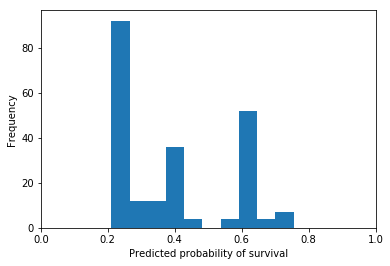

In [17]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [18]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [20]:
# old confusion matrix
print (confusion)

[[105  23]
 [ 51  44]]


In [21]:
# new confusion matrix
print (metrics.confusion_matrix(y_test, y_pred_class))

[[72 56]
 [32 63]]


In [22]:
# new sensitivity (higher than before)
print (63 / float(63 + 32))

0.6631578947368421


In [23]:
# new specificity (lower than before)
print (72 / float(72 + 56))

0.5625
